# Применение дискриминантного анализа для предсказания моделей машинного обучения на основе датасета "Рак молочной железы" (= Breast Cancer Wisconsin)

## LDA и QDA

**Можно разделить на train и test. После уже строить как модель машиннного обучения**

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

bcw = datasets.load_breast_cancer()

X = bcw.data
y = bcw.target
names = bcw['target_names']
feature_names = bcw['feature_names']

# OneHotEncoder – этот кодировщик берёт столбец с категориальными данными, 
# который был предварительно закодирован в признак, и создаёт для него несколько новых столбцов. 
# Числа заменяются на единицы и нули, в зависимости от того, какому столбцу какое значение присуще.
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Масштабируйте данные, чтобы иметь среднее значение 0 и дисперсию 1,
# что важно для сходимости нейронной сети.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=5)

n_features = X.shape[1]
print(n_features, "– кол-во признаков")
n_classes = Y.shape[1]
print(n_classes, "– кол-во классов (Benign – Доброкачественная опухоль; Malignant – Злокачественная опухоль)")

30 – кол-во признаков
2 – кол-во классов (Benign – Доброкачественная опухоль; Malignant – Злокачественная опухоль)


### LDA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, Y_train)

In [ ]:
X_test

array([[ 0.33306579,  1.39166794,  0.4296536 , ...,  1.33680049,
         1.82201617,  0.82094005],
       [-0.50761623,  0.68191246, -0.49918541, ..., -0.49739543,
        -1.02365992,  0.38093846],
       [ 0.10585444, -1.95465459,  0.09518918, ...,  0.11410472,
        -0.01901816, -0.21533574],
       ...,
       [-1.24548511, -0.8423165 , -1.25502559, ..., -0.95952266,
        -0.09667163, -0.12168301],
       [-0.10147593, -1.40081262, -0.16101387, ..., -0.86161564,
        -0.12579168, -0.88697545],
       [-1.49087337, -0.88420371, -1.45109094, ..., -1.01997225,
        -0.75510834, -0.53397669]])

In [ ]:
X_train

array([[ 1.17090767,  0.16064943,  1.13812505, ...,  1.1967158 ,
         0.26247566, -0.01473048],
       [ 1.93490586,  0.99373946,  1.93309591, ...,  1.46013593,
         0.36439584, -0.30233857],
       [-0.72630716, -0.05809488, -0.73191004, ..., -0.73036237,
         0.21717781, -0.06127977],
       ...,
       [ 1.07434285,  0.40266441,  1.33583801, ...,  1.24544091,
         0.55691174,  1.98688885],
       [ 0.46939261,  0.84248009,  0.56558126, ...,  1.35202709,
         0.60382737,  2.28613426],
       [-1.20742721, -0.46998576, -1.1965355 , ..., -0.89420056,
         0.1427599 , -0.56223876]])

In [ ]:
pred = []
for i in range(len(X_test)):
  pred.append(int(lda.predict([X_test[i]])))

pred_tr = []
for i in range(len(X_train)):
  pred_tr.append(int(lda.predict([X_train[i]])))

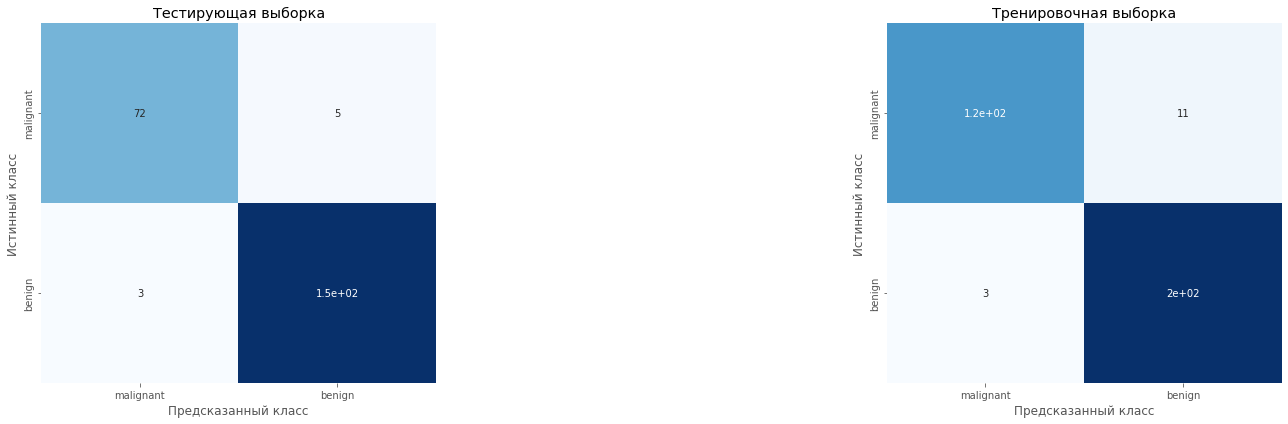


ヽ(°□° )ノ


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import numpy as np

# Создание одномерного массива из двумерного
def vector(Array):
  vec = []
  for i in range(len(Array)):
    vec.append(np.argmax(Array[i]))
  return vec

Y_Test = vector(Y_test)


# Создать матрицу ошибок
matrix_test = confusion_matrix(Y_test, pred)
matrix_train = confusion_matrix(Y_train, pred_tr)

# Создать фрейм данных pandas
dataframe_test = pd.DataFrame(matrix_test, index=names, columns=names)
dataframe_train = pd.DataFrame(matrix_train, index=names, columns=names)

# Создать тепловую карту
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.heatmap(dataframe_test, annot=True, cbar=None, cmap="Blues")
plt.title("Тестирующая выборка")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")

plt.subplot(1, 3, 3)
sns.heatmap(dataframe_train, annot=True, cbar=None, cmap="Blues")
plt.title("Тренировочная выборка")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

print("")
print("ヽ(°□° )ノ")

In [ ]:
result = []
for i in range(len(Y_test)):
  res = []
  res.append(Y_test[i])
  res.append(pred[i])
  result.append(res)

dataframe = pd.DataFrame(np.array(result))

In [ ]:
dataframe

,0,1
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
223,0,0
224,0,0
225,1,1
226,1,1


In [ ]:
result = []
for i in range(len(Y_train)):
  res = []
  res.append(Y_train[i])
  res.append(pred_tr[i])
  result.append(res)

dataframe_tr = pd.DataFrame(np.array(result))

In [ ]:
dataframe_tr

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
336,0,0
337,0,1
338,0,0
339,0,0


In [ ]:
from sklearn.metrics import r2_score
print("Точность тренировочной модели:", r2_score(Y_train, pred_tr)) # точность модели через коэффициент детерминации

print("Точность тестовой модели:", r2_score(Y_test, pred)) # точность модели через коэффициент детерминации

Точность тренировочной модели: 0.8283351312477526
Точность тестовой модели: 0.8431237636535649


### QDA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lda = QuadraticDiscriminantAnalysis()
model = lda.fit(X_train, Y_train)

In [ ]:
X_test

array([[ 0.33306579,  1.39166794,  0.4296536 , ...,  1.33680049,
         1.82201617,  0.82094005],
       [-0.50761623,  0.68191246, -0.49918541, ..., -0.49739543,
        -1.02365992,  0.38093846],
       [ 0.10585444, -1.95465459,  0.09518918, ...,  0.11410472,
        -0.01901816, -0.21533574],
       ...,
       [-1.24548511, -0.8423165 , -1.25502559, ..., -0.95952266,
        -0.09667163, -0.12168301],
       [-0.10147593, -1.40081262, -0.16101387, ..., -0.86161564,
        -0.12579168, -0.88697545],
       [-1.49087337, -0.88420371, -1.45109094, ..., -1.01997225,
        -0.75510834, -0.53397669]])

In [ ]:
X_train

array([[ 1.17090767,  0.16064943,  1.13812505, ...,  1.1967158 ,
         0.26247566, -0.01473048],
       [ 1.93490586,  0.99373946,  1.93309591, ...,  1.46013593,
         0.36439584, -0.30233857],
       [-0.72630716, -0.05809488, -0.73191004, ..., -0.73036237,
         0.21717781, -0.06127977],
       ...,
       [ 1.07434285,  0.40266441,  1.33583801, ...,  1.24544091,
         0.55691174,  1.98688885],
       [ 0.46939261,  0.84248009,  0.56558126, ...,  1.35202709,
         0.60382737,  2.28613426],
       [-1.20742721, -0.46998576, -1.1965355 , ..., -0.89420056,
         0.1427599 , -0.56223876]])

In [ ]:
pred = []
for i in range(len(X_test)):
  pred.append(int(lda.predict([X_test[i]])))

pred_tr = []
for i in range(len(X_train)):
  pred_tr.append(int(lda.predict([X_train[i]])))

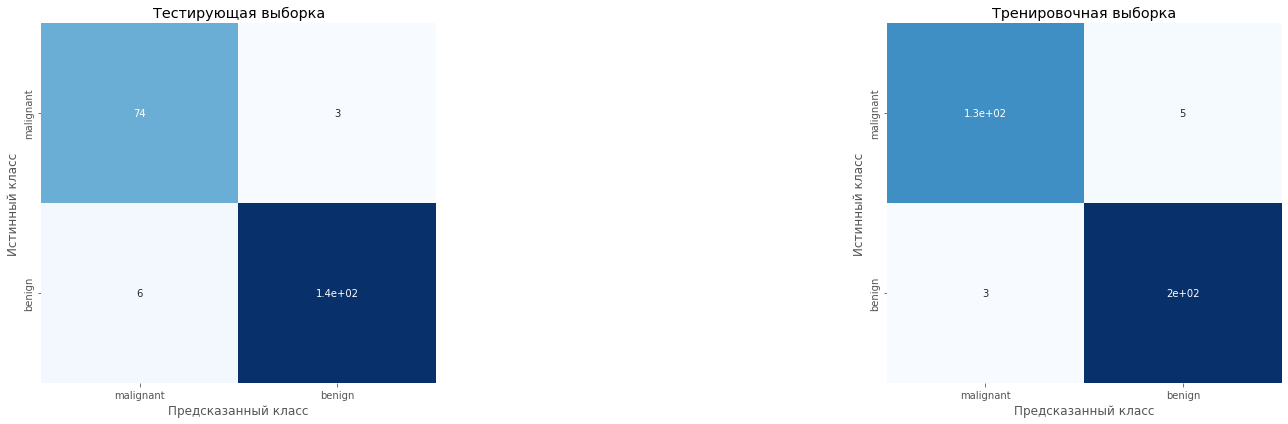


ヽ(°□° )ノ


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import numpy as np

# Создание одномерного массива из двумерного
def vector(Array):
  vec = []
  for i in range(len(Array)):
    vec.append(np.argmax(Array[i]))
  return vec

Y_Test = vector(Y_test)


# Создать матрицу ошибок
matrix_test = confusion_matrix(Y_test, pred)
matrix_train = confusion_matrix(Y_train, pred_tr)

# Создать фрейм данных pandas
dataframe_test = pd.DataFrame(matrix_test, index=names, columns=names)
dataframe_train = pd.DataFrame(matrix_train, index=names, columns=names)

# Создать тепловую карту
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.heatmap(dataframe_test, annot=True, cbar=None, cmap="Blues")
plt.title("Тестирующая выборка")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")

plt.subplot(1, 3, 3)
sns.heatmap(dataframe_train, annot=True, cbar=None, cmap="Blues")
plt.title("Тренировочная выборка")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

print("")
print("ヽ(°□° )ノ")

In [ ]:
result = []
for i in range(len(Y_test)):
  res = []
  res.append(Y_test[i])
  res.append(pred[i])
  result.append(res)

dataframe = pd.DataFrame(np.array(result))

In [ ]:
dataframe

,0,1
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
223,0,0
224,0,0
225,1,1
226,1,1


In [ ]:
result = []
for i in range(len(Y_train)):
  res = []
  res.append(Y_train[i])
  res.append(pred_tr[i])
  result.append(res)

dataframe_tr = pd.DataFrame(np.array(result))

In [ ]:
dataframe_tr

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
336,0,0
337,0,0
338,0,0
339,0,0


In [ ]:
from sklearn.metrics import r2_score
print("Точность тренировочной модели:", r2_score(Y_train, pred_tr)) # точность модели через коэффициент детерминации

print("Точность тестовой модели:", r2_score(Y_test, pred)) # точность модели через коэффициент детерминации

Точность тренировочной модели: 0.90190578928443
Точность тестовой модели: 0.8235142341102606


## FA –> LDA и QDA

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

bcw = datasets.load_breast_cancer()

X = bcw.data
from sklearn.decomposition import FactorAnalysis
import math
from sklearn import preprocessing

# Factor Analysis (всего будет 3 фактора)
fa = FactorAnalysis(n_components=3)
X = preprocessing.scale(X)
fa.fit(X)

y = bcw.target
names = bcw['target_names']
feature_names = bcw['feature_names']

# OneHotEncoder – этот кодировщик берёт столбец с категориальными данными, 
# который был предварительно закодирован в признак, и создаёт для него несколько новых столбцов. 
# Числа заменяются на единицы и нули, в зависимости от того, какому столбцу какое значение присуще.
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Масштабируйте данные, чтобы иметь среднее значение 0 и дисперсию 1,
# что важно для сходимости нейронной сети.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=5)

n_features = X.shape[1]
print(n_features, "– кол-во признаков")
n_classes = Y.shape[1]
print(n_classes, "– кол-во классов (Benign – Доброкачественная опухоль; Malignant – Злокачественная опухоль)")

30 – кол-во признаков
2 – кол-во классов (Benign – Доброкачественная опухоль; Malignant – Злокачественная опухоль)


In [ ]:
pd.DataFrame(fa.components_)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.963907,0.357097,0.970239,0.966495,0.265279,0.603395,0.750804,0.872317,0.241869,-0.177875,...,0.990000,0.351443,0.993635,0.980609,0.238593,0.516241,0.613867,0.811449,0.255167,0.136657
1,-0.144966,0.019635,-0.105509,-0.073237,0.400378,0.406596,0.351738,0.210743,0.419032,0.599976,...,-0.121418,-0.068845,-0.080522,-0.066358,0.186953,0.190586,0.180214,0.075506,0.076464,0.309932
2,0.044340,-0.053070,0.002981,0.095381,-0.450064,-0.628081,-0.459300,-0.314013,-0.406005,-0.622562,...,0.015961,-0.162847,-0.034143,0.074227,-0.555679,-0.741196,-0.659350,-0.489472,-0.538495,-0.788298


### LDA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, Y_train)

In [ ]:
X_test

array([[ 0.33306579,  1.39166794,  0.4296536 , ...,  1.33680049,
         1.82201617,  0.82094005],
       [-0.50761623,  0.68191246, -0.49918541, ..., -0.49739543,
        -1.02365992,  0.38093846],
       [ 0.10585444, -1.95465459,  0.09518918, ...,  0.11410472,
        -0.01901816, -0.21533574],
       ...,
       [-1.24548511, -0.8423165 , -1.25502559, ..., -0.95952266,
        -0.09667163, -0.12168301],
       [-0.10147593, -1.40081262, -0.16101387, ..., -0.86161564,
        -0.12579168, -0.88697545],
       [-1.49087337, -0.88420371, -1.45109094, ..., -1.01997225,
        -0.75510834, -0.53397669]])

In [ ]:
X_train

array([[ 1.17090767,  0.16064943,  1.13812505, ...,  1.1967158 ,
         0.26247566, -0.01473048],
       [ 1.93490586,  0.99373946,  1.93309591, ...,  1.46013593,
         0.36439584, -0.30233857],
       [-0.72630716, -0.05809488, -0.73191004, ..., -0.73036237,
         0.21717781, -0.06127977],
       ...,
       [ 1.07434285,  0.40266441,  1.33583801, ...,  1.24544091,
         0.55691174,  1.98688885],
       [ 0.46939261,  0.84248009,  0.56558126, ...,  1.35202709,
         0.60382737,  2.28613426],
       [-1.20742721, -0.46998576, -1.1965355 , ..., -0.89420056,
         0.1427599 , -0.56223876]])

In [ ]:
pred_tr = lda.predict(X_train)
pred = lda.predict(X_test)

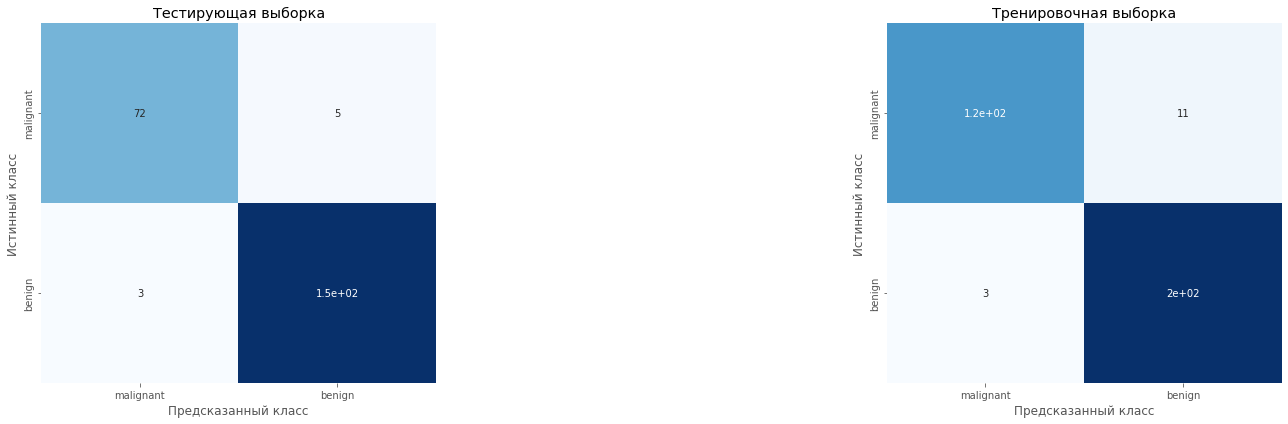


ヽ(°□° )ノ


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import numpy as np

# Создание одномерного массива из двумерного
def vector(Array):
  vec = []
  for i in range(len(Array)):
    vec.append(np.argmax(Array[i]))
  return vec

Y_Test = vector(Y_test)


# Создать матрицу ошибок
matrix_test = confusion_matrix(Y_test, pred)
matrix_train = confusion_matrix(Y_train, pred_tr)

# Создать фрейм данных pandas
dataframe_test = pd.DataFrame(matrix_test, index=names, columns=names)
dataframe_train = pd.DataFrame(matrix_train, index=names, columns=names)

# Создать тепловую карту
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.heatmap(dataframe_test, annot=True, cbar=None, cmap="Blues")
plt.title("Тестирующая выборка")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")

plt.subplot(1, 3, 3)
sns.heatmap(dataframe_train, annot=True, cbar=None, cmap="Blues")
plt.title("Тренировочная выборка")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

print("")
print("ヽ(°□° )ノ")

In [ ]:
result = []
for i in range(len(Y_test)):
  res = []
  res.append(Y_test[i])
  res.append(pred[i])
  result.append(res)

dataframe = pd.DataFrame(np.array(result))

In [ ]:
dataframe

,0,1
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
223,0,0
224,0,0
225,1,1
226,1,1


In [ ]:
result = []
for i in range(len(Y_train)):
  res = []
  res.append(Y_train[i])
  res.append(pred_tr[i])
  result.append(res)

dataframe_tr = pd.DataFrame(np.array(result))

In [ ]:
dataframe_tr

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
336,0,0
337,0,1
338,0,0
339,0,0


In [ ]:
from sklearn.metrics import r2_score
print("Точность тренировочной модели:", r2_score(Y_train, pred_tr)) # точность модели через коэффициент детерминации

print("Точность тестовой модели:", r2_score(Y_test, pred)) # точность модели через коэффициент детерминации

Точность тренировочной модели: 0.8283351312477526
Точность тестовой модели: 0.8431237636535649


### QDA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lda = QuadraticDiscriminantAnalysis()
model = lda.fit(X_train, Y_train)

In [ ]:
X_test

array([[ 0.33306579,  1.39166794,  0.4296536 , ...,  1.33680049,
         1.82201617,  0.82094005],
       [-0.50761623,  0.68191246, -0.49918541, ..., -0.49739543,
        -1.02365992,  0.38093846],
       [ 0.10585444, -1.95465459,  0.09518918, ...,  0.11410472,
        -0.01901816, -0.21533574],
       ...,
       [-1.24548511, -0.8423165 , -1.25502559, ..., -0.95952266,
        -0.09667163, -0.12168301],
       [-0.10147593, -1.40081262, -0.16101387, ..., -0.86161564,
        -0.12579168, -0.88697545],
       [-1.49087337, -0.88420371, -1.45109094, ..., -1.01997225,
        -0.75510834, -0.53397669]])

In [ ]:
X_train

array([[ 1.17090767,  0.16064943,  1.13812505, ...,  1.1967158 ,
         0.26247566, -0.01473048],
       [ 1.93490586,  0.99373946,  1.93309591, ...,  1.46013593,
         0.36439584, -0.30233857],
       [-0.72630716, -0.05809488, -0.73191004, ..., -0.73036237,
         0.21717781, -0.06127977],
       ...,
       [ 1.07434285,  0.40266441,  1.33583801, ...,  1.24544091,
         0.55691174,  1.98688885],
       [ 0.46939261,  0.84248009,  0.56558126, ...,  1.35202709,
         0.60382737,  2.28613426],
       [-1.20742721, -0.46998576, -1.1965355 , ..., -0.89420056,
         0.1427599 , -0.56223876]])

In [ ]:
pred_tr = lda.predict(X_train)
pred = lda.predict(X_test)

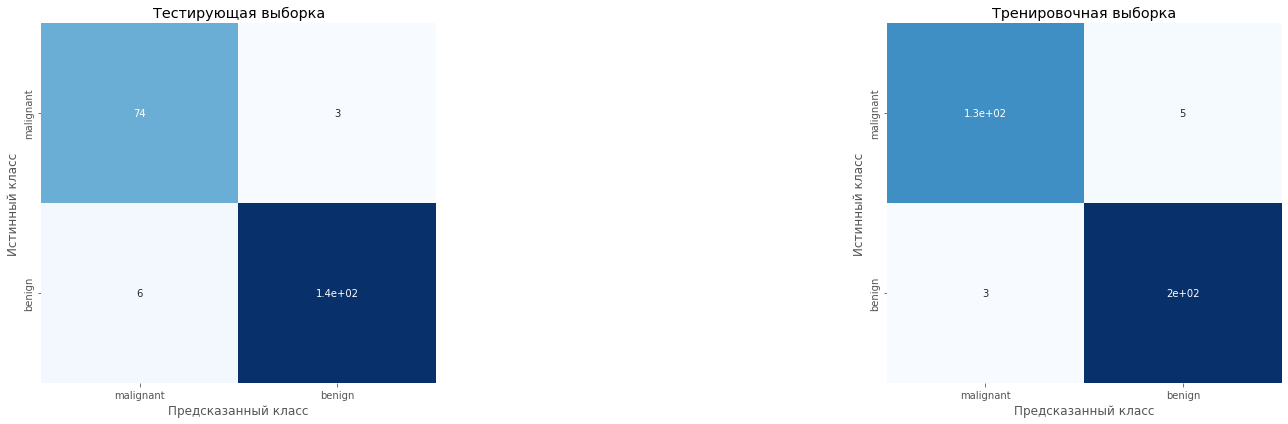


ヽ(°□° )ノ


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import numpy as np

# Создание одномерного массива из двумерного
def vector(Array):
  vec = []
  for i in range(len(Array)):
    vec.append(np.argmax(Array[i]))
  return vec

Y_Test = vector(Y_test)


# Создать матрицу ошибок
matrix_test = confusion_matrix(Y_test, pred)
matrix_train = confusion_matrix(Y_train, pred_tr)

# Создать фрейм данных pandas
dataframe_test = pd.DataFrame(matrix_test, index=names, columns=names)
dataframe_train = pd.DataFrame(matrix_train, index=names, columns=names)

# Создать тепловую карту
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.heatmap(dataframe_test, annot=True, cbar=None, cmap="Blues")
plt.title("Тестирующая выборка")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")

plt.subplot(1, 3, 3)
sns.heatmap(dataframe_train, annot=True, cbar=None, cmap="Blues")
plt.title("Тренировочная выборка")
plt.tight_layout()
plt.ylabel("Истинный класс")
plt.xlabel("Предсказанный класс")
plt.show()

print("")
print("ヽ(°□° )ノ")

In [ ]:
result = []
for i in range(len(Y_test)):
  res = []
  res.append(Y_test[i])
  res.append(pred[i])
  result.append(res)

dataframe = pd.DataFrame(np.array(result))

In [ ]:
dataframe

,0,1
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
223,0,0
224,0,0
225,1,1
226,1,1


In [ ]:
result = []
for i in range(len(Y_train)):
  res = []
  res.append(Y_train[i])
  res.append(pred_tr[i])
  result.append(res)

dataframe_tr = pd.DataFrame(np.array(result))

In [ ]:
dataframe_tr

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
336,0,0
337,0,0
338,0,0
339,0,0


In [ ]:
from sklearn.metrics import r2_score
print("Точность тренировочной модели:", r2_score(Y_train, pred_tr)) # точность модели через коэффициент детерминации

print("Точность тестовой модели:", r2_score(Y_test, pred)) # точность модели через коэффициент детерминации

Точность тренировочной модели: 0.90190578928443
Точность тестовой модели: 0.8235142341102606
